# Quadeer Shaikh M.Tech AI Roll: 006

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv("steel-industry-energy-consumption/Steel_industry_data.csv")

### Context
- This company produces several types of coils, steel plates, and iron plates. The information on electricity consumption is held in a cloud-based system. The information on energy consumption of the industry is stored on the website of the Korea Electric Power Corporation (pccs.kepco.go.kr), and the perspectives on daily, monthly, and annual data are calculated and shown.

**Data Source:** https://www.kaggle.com/csafrit2/steel-industry-energy-consumption / kaggle datasets download -d csafrit2/steel-industry-energy-consumption

This notebook contains a very basic EDA and preprocessing and experiments various combination of layers for different neural network architectures

In [3]:
data.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


### Meta Data

- **Date:** Continuous-time data taken on the first of the month
- **Usage_kWh:** Industry Energy Consumption Continuous kWh
- **Lagging Current:** reactive power Continuous kVarh
- **Leading Current:** reactive power Continuous kVarh
- **CO2:** Continuous ppm
- **NSM:** Number of Seconds from midnight Continuous S
- **Week status:** Categorical (Weekend (0) or a Weekday(1))
- **Day of week:** Categorical Sunday, Monday : Saturday
- **Load Type:** Categorical Light Load, Medium Load, Maximum Load

### Data Info
- Column names
- Data Type
- Null value counts

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

### Data Preprocessing 

#### Date Extraction

In [5]:
data['date'] = pd.to_datetime(data['date'])

In [6]:
data['date']

0       2018-01-01 00:15:00
1       2018-01-01 00:30:00
2       2018-01-01 00:45:00
3       2018-01-01 01:00:00
4       2018-01-01 01:15:00
                ...        
35035   2018-12-31 23:00:00
35036   2018-12-31 23:15:00
35037   2018-12-31 23:30:00
35038   2018-12-31 23:45:00
35039   2018-12-31 00:00:00
Name: date, Length: 35040, dtype: datetime64[ns]

In [7]:
data['date'].dt.month

0         1
1         1
2         1
3         1
4         1
         ..
35035    12
35036    12
35037    12
35038    12
35039    12
Name: date, Length: 35040, dtype: int64

In [8]:
data['date'].dt.day

0         1
1         1
2         1
3         1
4         1
         ..
35035    31
35036    31
35037    31
35038    31
35039    31
Name: date, Length: 35040, dtype: int64

In [9]:
data['date'].dt.hour

0         0
1         0
2         0
3         1
4         1
         ..
35035    23
35036    23
35037    23
35038    23
35039     0
Name: date, Length: 35040, dtype: int64

In [10]:
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['hour'] = data['date'].dt.hour

In [11]:
data.drop(columns='date',inplace=True)

In [12]:
data.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,month,day,hour
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000,6.526027,15.720548,11.500000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317,3.447901,8.796373,6.922285
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000,4.000000,8.000000,5.750000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000,7.000000,16.000000,11.500000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000,10.000000,23.000000,17.250000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000,12.000000,31.000000,23.000000


#### Categorical variable encoding 

In [13]:
for col in data.select_dtypes(include=['object']).columns:
    print(data[col].value_counts())
    print('------------------------------------')

Weekday    25056
Weekend     9984
Name: WeekStatus, dtype: int64
------------------------------------
Monday       5088
Tuesday      4992
Wednesday    4992
Thursday     4992
Friday       4992
Saturday     4992
Sunday       4992
Name: Day_of_week, dtype: int64
------------------------------------
Light_Load      18072
Medium_Load      9696
Maximum_Load     7272
Name: Load_Type, dtype: int64
------------------------------------


In [14]:
data['Load_Type'].replace('Light_Load',0,inplace=True)
data['Load_Type'].replace('Medium_Load',1,inplace=True)
data['Load_Type'].replace('Maximum_Load',2,inplace=True)

In [15]:
data['WeekStatus'].replace("Weekday",0,inplace=True)
data['WeekStatus'].replace("Weekend",1,inplace=True)

In [16]:
weekdays = pd.get_dummies(data['Day_of_week']).iloc[:,:-1]

In [17]:
data.drop(columns='Day_of_week',inplace=True)

In [18]:
data = data.join(weekdays)

In [19]:
data.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Load_Type,month,day,hour,Friday,Monday,Saturday,Sunday,Thursday,Tuesday
0,3.17,2.95,0.0,0.0,73.21,100.0,900,0,0,1,1,0,0,1,0,0,0,0
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,0,1,1,0,0,1,0,0,0,0
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,0,1,1,0,0,1,0,0,0,0
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,0,1,1,1,0,1,0,0,0,0
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,0,1,1,1,0,1,0,0,0,0


### Correlation Analysis

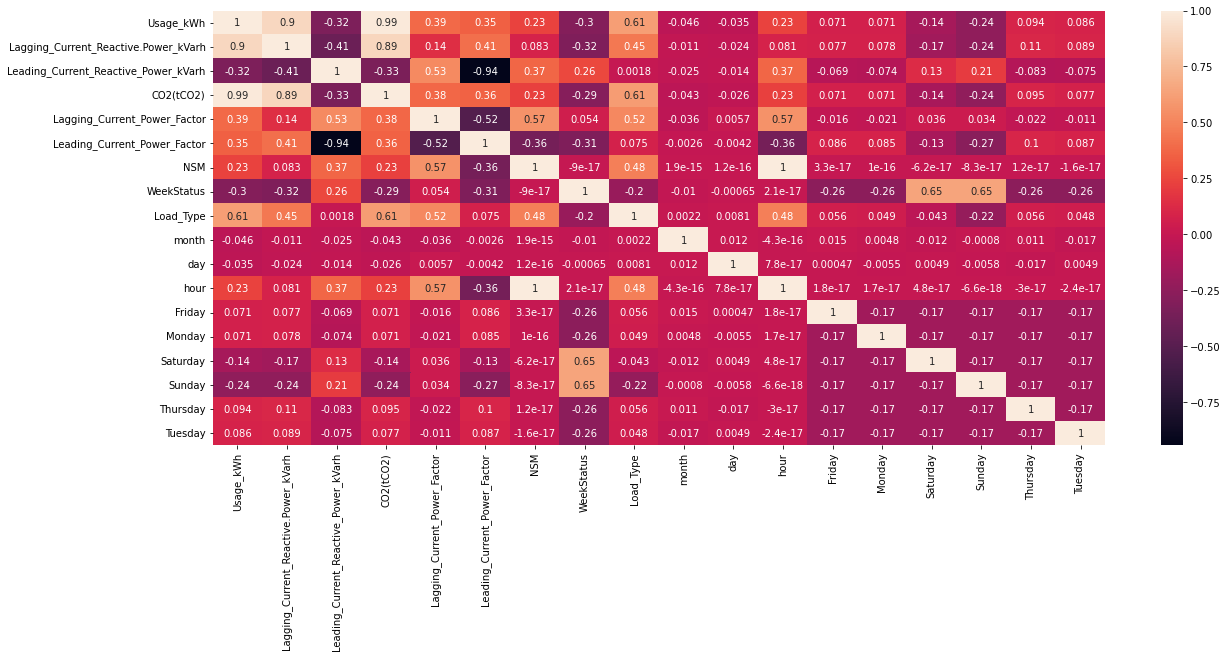

In [229]:
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(),annot=True)

In [20]:
X = data.iloc[:,1:].values
y = data.iloc[:,0].values

### Target Variable IQR Analysis
- Too many outliers present in the output variable

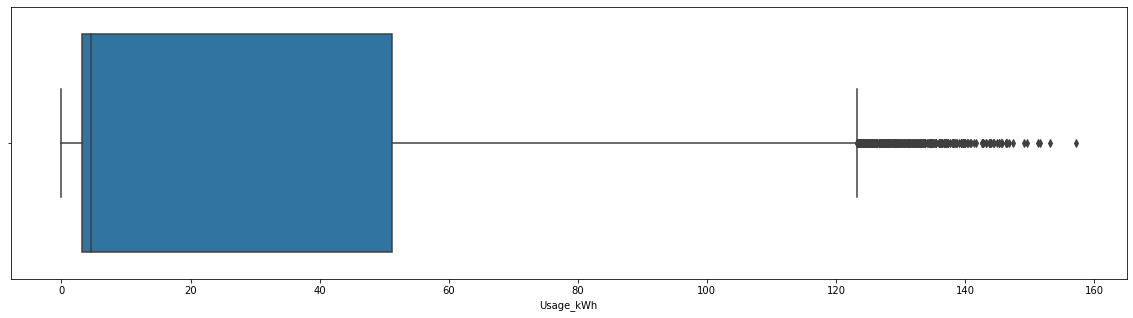

In [147]:
plt.figure(figsize=(20,5))
sns.boxplot(x='Usage_kWh',data=data)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

### Model

In [23]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [157]:
def build_model(layers,n,lr=0.001):
    model = Sequential()
    model.add(Dense(layers[0], activation='relu',input_shape=(n,)))
    for nlayer in layers[1:]:
        model.add(Dense(nlayer,activation='relu'))
    model.add(Dense(1))
              
    model.compile(
        optimizer=tf.keras.optimizers.RMSprop(lr),
        loss=tf.keras.losses.mean_squared_error,
        metrics=[tf.keras.metrics.mean_absolute_error]
    )
    return model

### Initially Tested Model Architecture

In [207]:
layers = [16,12]
n = X_train.shape[1]
model = build_model(layers,n)

In [208]:
model.summary()

Model: "sequential_83"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_249 (Dense)            (None, 16)                288       
_________________________________________________________________
dense_250 (Dense)            (None, 12)                204       
_________________________________________________________________
dense_251 (Dense)            (None, 1)                 13        
Total params: 505
Trainable params: 505
Non-trainable params: 0
_________________________________________________________________


In [209]:
batch_size = 32

history = model.fit(
                X_train_sc,
                y_train,
                batch_size = batch_size,
                epochs=100,
                steps_per_epoch=X_train.shape[0]//batch_size,
                validation_batch_size=batch_size,
                validation_data=(X_test_sc,y_test),
                validation_steps = X_test.shape[0]//batch_size,
                verbose=2
            )

Epoch 1/100
876/876 - 1s - loss: 655.7120 - mean_absolute_error: 13.0000 - val_loss: 27.5585 - val_mean_absolute_error: 3.4759
Epoch 2/100
876/876 - 0s - loss: 17.6852 - mean_absolute_error: 2.6067 - val_loss: 13.2315 - val_mean_absolute_error: 2.4013
Epoch 3/100
876/876 - 0s - loss: 13.8014 - mean_absolute_error: 2.1660 - val_loss: 11.1286 - val_mean_absolute_error: 2.0948
Epoch 4/100
876/876 - 0s - loss: 12.7009 - mean_absolute_error: 2.0066 - val_loss: 10.5391 - val_mean_absolute_error: 1.9836
Epoch 5/100
876/876 - 0s - loss: 11.7547 - mean_absolute_error: 1.9157 - val_loss: 10.0328 - val_mean_absolute_error: 1.9365
Epoch 6/100
876/876 - 0s - loss: 10.9805 - mean_absolute_error: 1.8553 - val_loss: 9.9226 - val_mean_absolute_error: 1.9305
Epoch 7/100
876/876 - 0s - loss: 10.2961 - mean_absolute_error: 1.7974 - val_loss: 8.3453 - val_mean_absolute_error: 1.7557
Epoch 8/100
876/876 - 0s - loss: 9.5929 - mean_absolute_error: 1.7495 - val_loss: 8.9132 - val_mean_absolute_error: 1.8300
Ep

876/876 - 0s - loss: 1.4497 - mean_absolute_error: 0.6653 - val_loss: 1.6753 - val_mean_absolute_error: 0.7431
Epoch 68/100
876/876 - 0s - loss: 1.4280 - mean_absolute_error: 0.6616 - val_loss: 1.6440 - val_mean_absolute_error: 0.7486
Epoch 69/100
876/876 - 0s - loss: 1.4176 - mean_absolute_error: 0.6575 - val_loss: 1.4210 - val_mean_absolute_error: 0.6670
Epoch 70/100
876/876 - 0s - loss: 1.4046 - mean_absolute_error: 0.6563 - val_loss: 1.4890 - val_mean_absolute_error: 0.6808
Epoch 71/100
876/876 - 0s - loss: 1.4190 - mean_absolute_error: 0.6565 - val_loss: 1.5213 - val_mean_absolute_error: 0.6978
Epoch 72/100
876/876 - 0s - loss: 1.3900 - mean_absolute_error: 0.6479 - val_loss: 1.5581 - val_mean_absolute_error: 0.7075
Epoch 73/100
876/876 - 0s - loss: 1.3756 - mean_absolute_error: 0.6476 - val_loss: 1.5477 - val_mean_absolute_error: 0.7167
Epoch 74/100
876/876 - 0s - loss: 1.3469 - mean_absolute_error: 0.6403 - val_loss: 1.4352 - val_mean_absolute_error: 0.6683
Epoch 75/100
876/876 

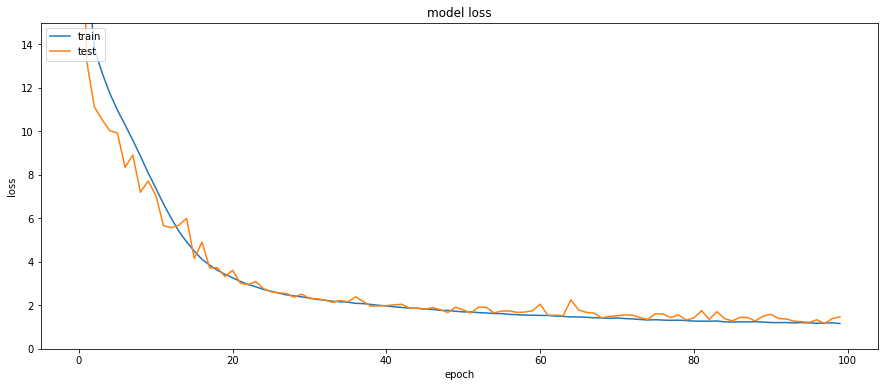

In [210]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim([0,15])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [211]:
y_pred = model.predict(X_test_sc)
y_pred = y_pred.reshape(-1,)
print("RMSE: ",mean_squared_error(y_test,y_pred,squared=False))
print("MSE: ",mean_squared_error(y_test,y_pred))
print("MAE: ",mean_absolute_error(y_test,y_pred))
print("R Squared: ",r2_score(y_test,y_pred))

RMSE:  1.2125675032604042
MSE:  1.4703199499631705
MAE:  0.666888343835394
R Squared:  0.9987065267382647


**Conclusion:** Model RMSE is 1.21, Usage kWh should be further reduced to less than 1 atleast. 

### Final Model Architecture (after various experiments)

In [212]:
layers = [32,24]
n = X_train.shape[1]
model = build_model(layers,n,0.001)

In [213]:
model.summary()

Model: "sequential_84"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_252 (Dense)            (None, 32)                576       
_________________________________________________________________
dense_253 (Dense)            (None, 24)                792       
_________________________________________________________________
dense_254 (Dense)            (None, 1)                 25        
Total params: 1,393
Trainable params: 1,393
Non-trainable params: 0
_________________________________________________________________


In [214]:
batch_size = 32

history = model.fit(
                X_train_sc,
                y_train,
                batch_size = batch_size,
                epochs=100,
                steps_per_epoch=X_train.shape[0]//batch_size,
                validation_batch_size=batch_size,
                validation_data=(X_test_sc,y_test),
                validation_steps = X_test.shape[0]//batch_size,
                verbose=2
            )

Epoch 1/100
876/876 - 1s - loss: 369.9291 - mean_absolute_error: 8.6182 - val_loss: 14.1335 - val_mean_absolute_error: 2.5785
Epoch 2/100
876/876 - 0s - loss: 13.9270 - mean_absolute_error: 2.1965 - val_loss: 16.4502 - val_mean_absolute_error: 2.5471
Epoch 3/100
876/876 - 0s - loss: 12.1960 - mean_absolute_error: 1.9943 - val_loss: 10.5336 - val_mean_absolute_error: 2.0484
Epoch 4/100
876/876 - 0s - loss: 10.8784 - mean_absolute_error: 1.8944 - val_loss: 10.3262 - val_mean_absolute_error: 2.0241
Epoch 5/100
876/876 - 0s - loss: 9.6209 - mean_absolute_error: 1.7914 - val_loss: 8.0248 - val_mean_absolute_error: 1.7824
Epoch 6/100
876/876 - 0s - loss: 8.5395 - mean_absolute_error: 1.7011 - val_loss: 6.9132 - val_mean_absolute_error: 1.6442
Epoch 7/100
876/876 - 0s - loss: 7.4427 - mean_absolute_error: 1.5992 - val_loss: 6.5404 - val_mean_absolute_error: 1.6080
Epoch 8/100
876/876 - 1s - loss: 6.5396 - mean_absolute_error: 1.5069 - val_loss: 5.6114 - val_mean_absolute_error: 1.4833
Epoch 9

876/876 - 0s - loss: 1.0520 - mean_absolute_error: 0.5333 - val_loss: 1.0634 - val_mean_absolute_error: 0.5781
Epoch 68/100
876/876 - 0s - loss: 1.0499 - mean_absolute_error: 0.5300 - val_loss: 1.0658 - val_mean_absolute_error: 0.5091
Epoch 69/100
876/876 - 0s - loss: 1.0218 - mean_absolute_error: 0.5283 - val_loss: 1.0614 - val_mean_absolute_error: 0.5507
Epoch 70/100
876/876 - 0s - loss: 1.0275 - mean_absolute_error: 0.5273 - val_loss: 0.9101 - val_mean_absolute_error: 0.5078
Epoch 71/100
876/876 - 1s - loss: 1.0260 - mean_absolute_error: 0.5228 - val_loss: 1.1233 - val_mean_absolute_error: 0.5722
Epoch 72/100
876/876 - 1s - loss: 1.0059 - mean_absolute_error: 0.5156 - val_loss: 0.8879 - val_mean_absolute_error: 0.4807
Epoch 73/100
876/876 - 1s - loss: 1.0245 - mean_absolute_error: 0.5206 - val_loss: 1.0953 - val_mean_absolute_error: 0.5650
Epoch 74/100
876/876 - 1s - loss: 0.9964 - mean_absolute_error: 0.5121 - val_loss: 1.0504 - val_mean_absolute_error: 0.5766
Epoch 75/100
876/876 

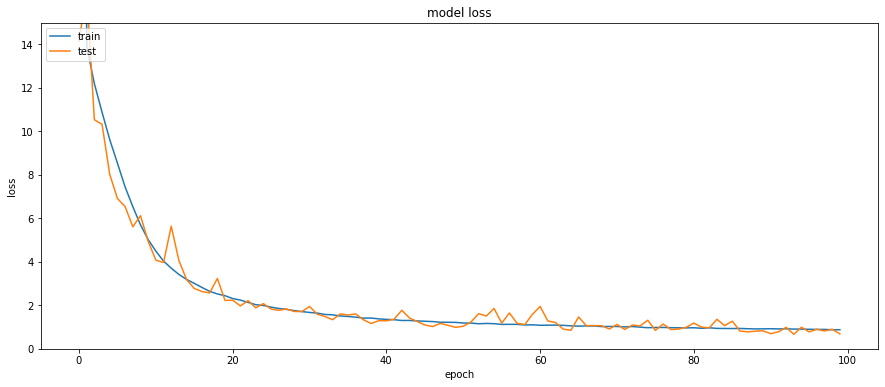

In [215]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim([0,15])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [216]:
y_pred = model.predict(X_test_sc)
y_pred = y_pred.reshape(-1,)
print("RMSE: ",mean_squared_error(y_test,y_pred,squared=False))
print("MSE: ",mean_squared_error(y_test,y_pred))
print("MAE: ",mean_absolute_error(y_test,y_pred))
print("R Squared: ",r2_score(y_test,y_pred))

RMSE:  0.8291987625379571
MSE:  0.6875705877944793
MAE:  0.4462717973730063
R Squared:  0.9993951288147249


**Conclusion:** Model with this architecture gives better results in terms of RMSE and MAE (as the target variable contains outliers, it is better to consider MAE also).

In [217]:
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore")
tf.get_logger().setLevel('ERROR')

kf = KFold(n_splits=5) 

### 5 - Fold Cross Validation
- Model trained on 5 folds to determine what should be the optimum number of epochs by taking an average of loss function across 5 folds. 

In [218]:
scaler = StandardScaler()
performance = []
models = []

for fold, (train,val) in enumerate(kf.split(X=X,y=y)):
    print(f"Training fold: {fold+1}")

    X_train = X[train,:]
    y_train = y[train]
    
    X_val = X[val,:]
    y_val = y[val]
    
    X_train_sc = scaler.fit_transform(X_train)
    X_val_sc = scaler.transform(X_val)
    
    layers = [32,24]
    n = X_train.shape[1]
    model = build_model(layers,n,0.001)
    
    batch_size = 32

    history = model.fit(
                    X_train_sc,
                    y_train,
                    batch_size = batch_size,
                    epochs=100,
                    steps_per_epoch=X_train_sc.shape[0]//batch_size,
                    validation_batch_size=batch_size,
                    validation_data=(X_val_sc,y_val),
                    validation_steps = X_val_sc.shape[0]//batch_size,
                    verbose=0
                )
    
    performance.append(history)
    models.append(model)
    
    y_pred = model.predict(X_val_sc)
    print("RMSE: ",mean_squared_error(y_val,y_pred,squared=False))
    print("MSE: ",mean_squared_error(y_val,y_pred))
    print("MAE: ",mean_absolute_error(y_val,y_pred))
    print("R Squared: ",r2_score(y_val,y_pred))
    print("---------------------------------------")

Training fold: 1
RMSE:  1.7438076788745722
MSE:  3.040865220901923
MAE:  0.8308420082355199
R Squared:  0.9979751225018251
---------------------------------------
Training fold: 2
RMSE:  1.1817651155460867
MSE:  1.3965687883216553
MAE:  0.536937768176266
R Squared:  0.9987409688452329
---------------------------------------
Training fold: 3
RMSE:  0.9520622344630874
MSE:  0.9064224982908466
MAE:  0.5102980397328666
R Squared:  0.9990072544117367
---------------------------------------
Training fold: 4
RMSE:  0.6843241217586254
MSE:  0.468299503620714
MAE:  0.3151977216234626
R Squared:  0.9995235710918843
---------------------------------------
Training fold: 5
RMSE:  1.059220237056975
MSE:  1.1219475105910344
MAE:  0.65539960395936
R Squared:  0.9988600388715624
---------------------------------------


### Average Loss

In [219]:
avg_train_loss = []
avg_val_loss = []

for i in range(len(performance)):
    avg_train_loss.append(performance[i].history['loss'])
    avg_val_loss.append(performance[i].history['val_loss'])
    
avg_train_loss = np.array(avg_train_loss).mean(axis=0)
avg_val_loss = np.array(avg_val_loss).mean(axis=0)

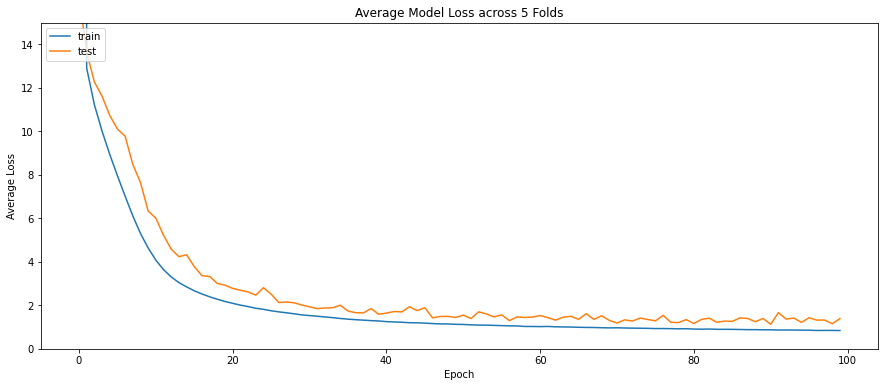

In [223]:
plt.figure(figsize=(15,6))
plt.plot(avg_train_loss)
plt.plot(avg_val_loss)
plt.title('Average Model Loss across 5 Folds')
plt.ylabel('Average Loss')
plt.xlabel('Epoch')
plt.ylim([0,15])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Conclusion:** Training can be stopped at some point between 80-85 epochs 